In [2]:
import numpy as np
import time
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

KM sil coeff: [0.6810461692117462, 0.6810461692117462, 0.6810461692117462]
GM sil coeff: [0.6867350732769777, 0.6867350732769777, 0.6867350732769777]
KM ARI: [0.5399218294207123, 0.5399218294207123, 0.5399218294207123]
GM ARI: [0.5681159420289855, 0.5681159420289855, 0.5681159420289855]


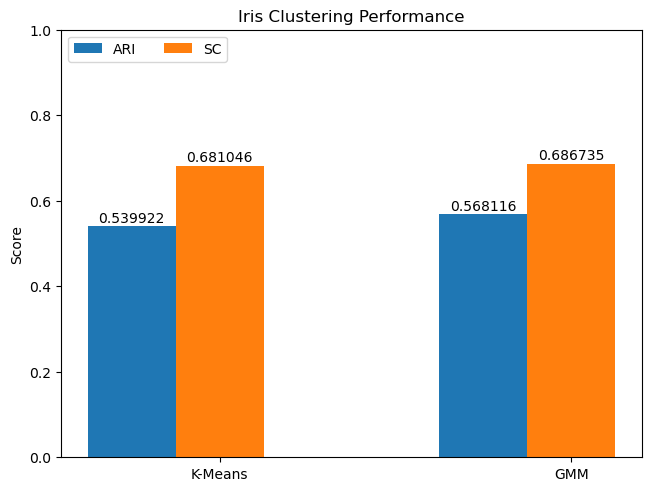

In [3]:
# Iris Clusters

X, y = datasets.load_iris(return_X_y=True)

km_ari = []
km_sc = []
gm_ari = []
gm_sc = []

km_time = []
gm_time = []

for i in range(3):
    
    start = time.time()
    km = KMeans(n_clusters=2, random_state=np.random.randint(100)).fit(X)
    stop = time.time()
    km_time.append(stop-start)
    labels = km.predict(X)
    km_ari.append(metrics.adjusted_rand_score(y, labels))
    km_sc.append(metrics.silhouette_score(X, labels))
    
    start = time.time()
    gm = GaussianMixture(n_components=2,covariance_type ='full', 
                         random_state=np.random.randint(100)).fit(X)
    stop = time.time()
    gm_time.append(stop-start)
    labels = gm.predict(X)
    gm_ari.append(metrics.adjusted_rand_score(y, labels))
    gm_sc.append(metrics.silhouette_score(X, labels))
    

print("KM sil coeff:", km_sc)
print("GM sil coeff:", gm_sc)
print("KM ARI:", km_ari)
print("GM ARI:", gm_ari)

# Iris plots
species = ("K-Means", "GMM")
penguin_means = {
    'ARI': (np.mean(km_ari), np.mean(gm_ari)),
    'SC': (np.mean(km_sc), np.mean(gm_sc)),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=1)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Iris Clustering Performance')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0,1)

plt.show()

KM sil coeff: [0.6972646156059464, 0.6972646156059464, 0.6972646156059464, 0.6972646156059464, 0.6972646156059464]
GM sil coeff: [0.5315172918032405, 0.5315172918032405, 0.5315172918032405, 0.5315172918032405, 0.5315172918032405]
KM ARI: [0.49142453622455523, 0.49142453622455523, 0.49142453622455523, 0.49142453622455523, 0.49142453622455523]
GM ARI: [0.811631803886236, 0.811631803886236, 0.811631803886236, 0.811631803886236, 0.811631803886236]


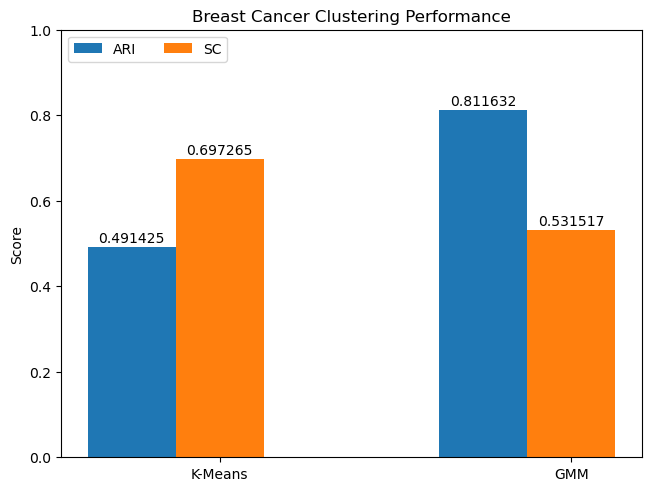

In [4]:
# BC Clusters

X, y = datasets.load_breast_cancer(return_X_y=True)

km_ari = []
km_sc = []
gm_ari = []
gm_sc = []

km_time = []
gm_time = []

for i in range(5):
    
    start = time.time()
    km = KMeans(n_clusters=2, random_state=np.random.randint(100)).fit(X)
    stop = time.time()
    km_time.append(stop-start)
    labels = km.predict(X)
    km_ari.append(metrics.adjusted_rand_score(y, labels))
    km_sc.append(metrics.silhouette_score(X, labels))
    
    start = time.time()
    gm = GaussianMixture(n_components=2,covariance_type ='full', 
                         random_state=np.random.randint(100)).fit(X)
    stop = time.time()
    gm_time.append(stop-start)
    labels = gm.predict(X)
    gm_ari.append(metrics.adjusted_rand_score(y, labels))
    gm_sc.append(metrics.silhouette_score(X, labels))
    

print("KM sil coeff:", km_sc)
print("GM sil coeff:", gm_sc)
print("KM ARI:", km_ari)
print("GM ARI:", gm_ari)

# Iris plots
species = ("K-Means", "GMM")
penguin_means = {
    'ARI': (np.mean(km_ari), np.mean(gm_ari)),
    'SC': (np.mean(km_sc), np.mean(gm_sc)),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=1)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Breast Cancer Clustering Performance')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0,1)

plt.show()

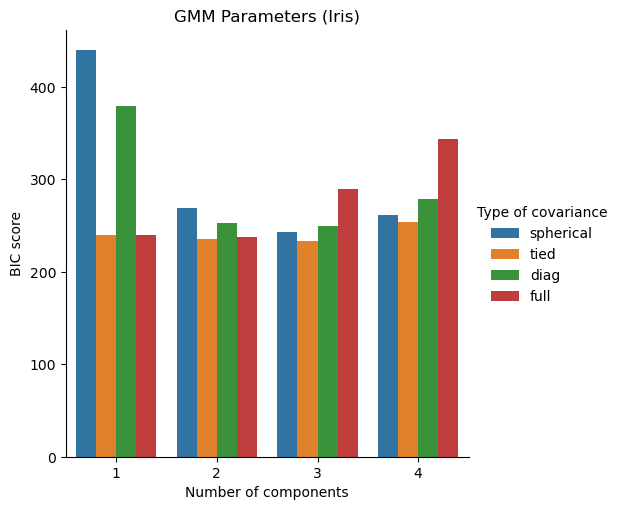

In [25]:
# GMM Grid search Iris
X, y = datasets.load_iris(return_X_y=True)

def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": range(1, 5),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search.fit(X)

df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df["mean_test_score"] = -df["mean_test_score"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df.sort_values(by="BIC score").head()

sns.catplot(
    data=df,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.title("GMM Parameters (Iris)")
plt.show()

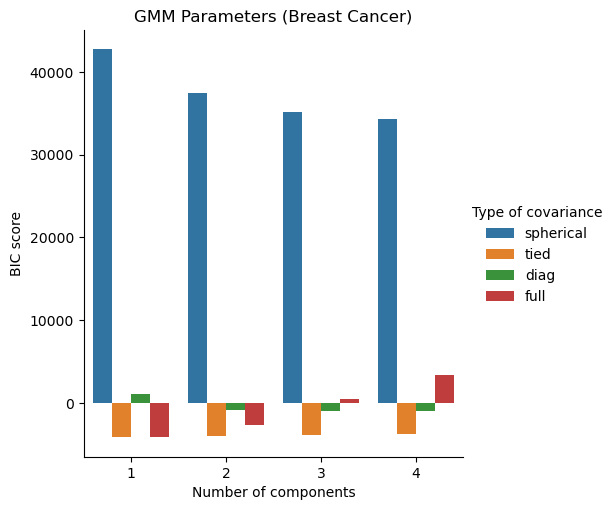

In [27]:
# GMM Grid search BC
X, y = datasets.load_breast_cancer(return_X_y=True)

def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": range(1, 5),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search.fit(X)

df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df["mean_test_score"] = -df["mean_test_score"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df.sort_values(by="BIC score").head()

sns.catplot(
    data=df,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.title("GMM Parameters (Breast Cancer)")
plt.show()

In [14]:
# Determine best cluster and component count for Iris

X, y = datasets.load_iris(return_X_y=True)

s_best_k = 0
best_s_score = 0

ch_best_k = 0
best_ch_score = 0

db_best_k = 0
best_db_score = 99999

best_bic = 99999
bic_best_n = 0
best_aic = 99999
aic_best_n = 0

best_gm_sil = 0
sil_best_n = 0

for k in range(2,4):
    km = KMeans(n_clusters=k, random_state=np.random.randint(100)).fit(X)
    gm = GaussianMixture(n_components=k,
                         covariance_type='tied',
                         random_state=np.random.randint(100)).fit(X)
    km_labels = km.predict(X)
    gm_labels = gm.predict(X)
    s_score = metrics.silhouette_score(X, km_labels)
    ch_score = metrics.calinski_harabasz_score(X, km_labels)
    db_score = metrics.davies_bouldin_score(X, km_labels)
    
    print("k=", k)
    print("SC:", s_score)
    print("CH:", ch_score)
    print("DB:", db_score)
    
    ss_gm = metrics.silhouette_score(X, gm_labels)
    
    bic = gm.bic(X)
    aic = gm.aic(X)
    
    
    if (s_score > best_s_score):
        s_best_k = k
        best_s_score = s_score
    
    if (ch_score > best_ch_score ):
        ch_best_k = k
        best_ch_score = ch_score
    
    if (db_score < best_db_score ):
        db_best_k = k
        best_db_score  = db_score 
    
    if (bic < best_bic):
        best_bic = bic
        bic_best_n = k
    
    if (aic < best_aic):
        best_aic = aic
        aic_best_n = k
    
    if (ss_gm > best_gm_sil):
        sil_best_n = k
        best_gm_sil = ss_gm

print("Iris cluster/component counts")
print("best k (sil):", s_best_k, "best k (calinski_harabasz):", ch_best_k, "best k (davies_bouldin_score):", db_best_k)
print("AIC best n:", aic_best_n, "BIC best n:", bic_best_n, "sil coff best N:", sil_best_n)

k= 2
SC: 0.6810461692117462
CH: 513.9245459802768
DB: 0.4042928371730436
k= 3
SC: 0.5528190123564095
CH: 561.62775662962
DB: 0.6619715465007484
Iris cluster/component counts
best k (sil): 2 best k (calinski_harabasz): 3 best k (davies_bouldin_score): 2
AIC best n: 3 BIC best n: 3 sil coff best N: 2


In [23]:
# Determine best cluster and component count for Iris

X, y = datasets.load_breast_cancer(return_X_y=True)

s_best_k = 0
best_s_score = 0

ch_best_k = 0
best_ch_score = 0

db_best_k = 0
best_db_score = 99999

best_bic = 99999
bic_best_n = 0
best_aic = 99999
aic_best_n = 0

best_gm_sil = 0
sil_best_n = 0

for k in range(2,4):
    km = KMeans(n_clusters=k, random_state=np.random.randint(100)).fit(X)
    gm = GaussianMixture(n_components=k,
                         covariance_type='full',
                         random_state=np.random.randint(100)).fit(X)
    km_labels = km.predict(X)
    gm_labels = gm.predict(X)
    s_score = metrics.silhouette_score(X, km_labels)
    ch_score = metrics.calinski_harabasz_score(X, km_labels)
    db_score = metrics.davies_bouldin_score(X, km_labels)
    
    print("k=", k)
    print("SC:", s_score)
    print("CH:", ch_score)
    print("DB:", db_score)
    
    ss_gm = metrics.silhouette_score(X, gm_labels)
    
    bic = gm.bic(X)
    aic = gm.aic(X)
    
    
    if (s_score > best_s_score):
        s_best_k = k
        best_s_score = s_score
    
    if (ch_score > best_ch_score ):
        ch_best_k = k
        best_ch_score = ch_score
    
    if (db_score < best_db_score ):
        db_best_k = k
        best_db_score  = db_score 
    
    if (bic < best_bic):
        best_bic = bic
        bic_best_n = k
    
    if (aic < best_aic):
        best_aic = aic
        aic_best_n = k
    
    if (ss_gm > best_gm_sil):
        sil_best_n = k
        best_gm_sil = ss_gm

print("Iris cluster/component counts")
print("best k (sil):", s_best_k, "best k (calinski_harabasz):", ch_best_k, "best k (davies_bouldin_score):", db_best_k)
print("AIC best n:", aic_best_n, "BIC best n:", bic_best_n, "sil coff best N:", sil_best_n)

k= 2
SC: 0.6972646156059464
CH: 1300.2082268895424
DB: 0.5044035685410988
k= 3
SC: 0.6695939093799408
CH: 1253.8645507575184
DB: 0.5727505055537575
Iris cluster/component counts
best k (sil): 2 best k (calinski_harabasz): 2 best k (davies_bouldin_score): 2
AIC best n: 3 BIC best n: 2 sil coff best N: 2


In [26]:
# BC KM

X, y = datasets.load_breast_cancer(return_X_y=True)
X = StandardScaler().fit_transform(X) 

ari_scores = []
sc_scores = []
fit_times = []

for i in range(5):
    start = time.time()
    km = KMeans(n_clusters=2, random_state=np.random.randint(100)).fit(X)
    stop = time.time()
    fit_times.append(stop-start)
    labels = km.predict(X)
    ari_scores.append(metrics.adjusted_rand_score(y, labels))
    sc_scores.append(metrics.silhouette_score(X, labels))

print("Mean times:", np.mean(fit_times))
print("Mean rand score:", np.mean(ari_scores))
print("Rand var score:", np.var(ari_scores))
print("Mean SC score:", np.mean(sc_scores))

Mean times: 0.3261439323425293
Mean rand score: 0.6673014390286682
Rand var score: 4.676395142640808e-05
Mean SC score: 0.3446556522209083


In [28]:
# BC GM

X, y = datasets.load_breast_cancer(return_X_y=True)
X = StandardScaler().fit_transform(X) 

ari_scores = []
sc_scores = []
fit_times = []

for i in range(5):
    start = time.time()
    gm = GaussianMixture(n_components=2,covariance_type ='tied', 
                         random_state=np.random.randint(100)).fit(X)
    stop = time.time()
    fit_times.append(stop-start)
    labels = km.predict(X)
    ari_scores.append(metrics.adjusted_rand_score(y, labels))
    sc_scores.append(metrics.silhouette_score(X, labels))

print("Mean times:", np.mean(fit_times))
print("Mean rand score:", np.mean(ari_scores))
print("Rand var score:", np.var(ari_scores))
print("Mean SC score:", np.mean(sc_scores))

Mean times: 0.06639728546142579
Mean rand score: 0.6707206476880808
Rand var score: 0.0
Mean SC score: 0.3449740051034408


ARI: [0.9038742317748124, 0.8856970310281228, 0.7445264308738749, 0.7302382722834697]
SC: [0.5011761635067206, 0.4904438685235771, 0.5522806746748185, 0.5528190123564095]


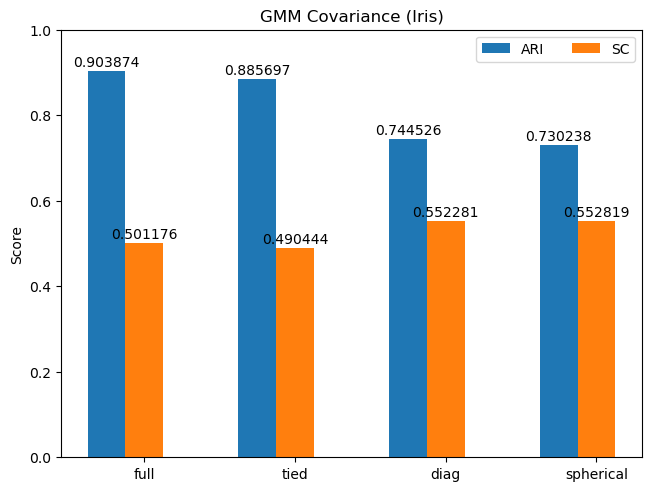

In [31]:
# Iris GM Covariance

X, y = datasets.load_iris(return_X_y=True)

ari_scores = []
sc_scores = []

for cov in ['full', 'tied', 'diag', 'spherical']:
    gm = GaussianMixture(n_components=3,covariance_type =cov, 
                         random_state=np.random.randint(100)).fit(X)
    labels = gm.predict(X)
    ari_scores.append(metrics.adjusted_rand_score(y, labels))
    sc_scores.append(metrics.silhouette_score(X, labels))

print("ARI:", ari_scores)
print("SC:", sc_scores)

# plots
species = ('full', 'tied', 'diag', 'spherical')
penguin_means = {
    'ARI': ari_scores,
    'SC': sc_scores,
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=1)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('GMM Covariance (Iris)')
ax.set_xticks(x + width, species)
ax.legend(loc='upper right', ncols=3)
ax.set_ylim(0,1)

plt.show()

ARI: [0.811631803886236, 0.4203717693475369, 0.6779411384513467, 0.6644358175948254]
SC: [0.5315172918032405, 0.6709698935585761, 0.4535670626662011, 0.6304922576342218]


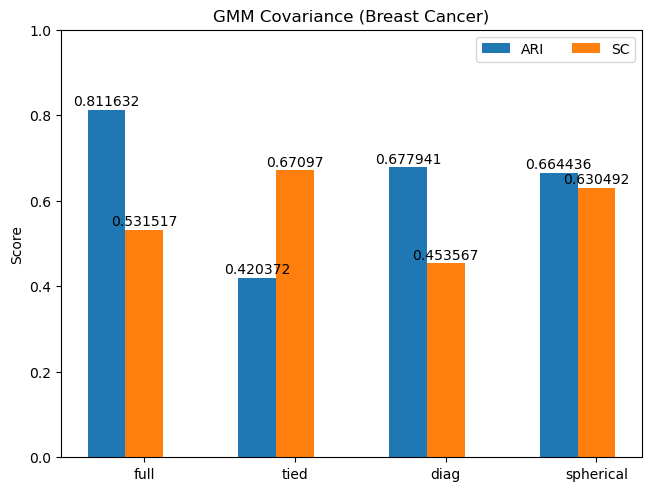

In [30]:
# BC GM Covariance

X, y = datasets.load_breast_cancer(return_X_y=True)

ari_scores = []
sc_scores = []

for cov in ['full', 'tied', 'diag', 'spherical']:
    gm = GaussianMixture(n_components=2,covariance_type =cov, 
                         random_state=np.random.randint(100)).fit(X)
    labels = gm.predict(X)
    ari_scores.append(metrics.adjusted_rand_score(y, labels))
    sc_scores.append(metrics.silhouette_score(X, labels))

print("ARI:", ari_scores)
print("SC:", sc_scores)

# plots
species = ('full', 'tied', 'diag', 'spherical')
penguin_means = {
    'ARI': ari_scores,
    'SC': sc_scores,
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=1)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('GMM Covariance (Breast Cancer)')
ax.set_xticks(x + width, species)
ax.legend(loc='upper right', ncols=3)
ax.set_ylim(0,1)

plt.show()

In [17]:
# Iris Clusters

X, y = datasets.load_iris(return_X_y=True)

ari_scores = []
sc_scores = []
fit_times = []

for i in range(5):
    start = time.time()
    km = KMeans(n_clusters=2, random_state=np.random.randint(100), init='random').fit(X)
    stop = time.time()
    fit_times.append(stop-start)
    labels = km.predict(X)
    ari_scores.append(metrics.adjusted_rand_score(y, labels))
    sc_scores.append(metrics.silhouette_score(X, labels))

km = KMeans(n_clusters=2, random_state=np.random.randint(100), init='random').fit(X)
print("cluster centers:", km.cluster_centers_)
    
print("ARI", ari_scores)
print("SC", sc_scores)
print("Mean times:", np.mean(fit_times))
print("Mean rand score:", np.mean(ari_scores))
print("Rand var score:", np.var(ari_scores))
print("Mean SC score:", np.mean(sc_scores))


cluster centers: [[6.30103093 2.88659794 4.95876289 1.69587629]
 [5.00566038 3.36981132 1.56037736 0.29056604]]
ARI [0.5399218294207123, 0.5399218294207123, 0.5399218294207123, 0.5399218294207123, 0.5399218294207123]
SC [0.6810461692117462, 0.6810461692117462, 0.6810461692117462, 0.6810461692117462, 0.6810461692117462]
Mean times: 0.39112286567687987
Mean rand score: 0.5399218294207123
Rand var score: 0.0
Mean SC score: 0.6810461692117462


In [39]:
# Iris GM

X, y = datasets.load_iris(return_X_y=True)
X = StandardScaler().fit_transform(X) 

ari_scores = []
sc_scores = []
fit_times = []

for i in range(5):
    start = time.time()
    gm = GaussianMixture(n_components=2,covariance_type ='tied', 
                         random_state=np.random.randint(100)).fit(X)
    stop = time.time()
    fit_times.append(stop-start)
    labels = km.predict(X)
    ari_scores.append(metrics.adjusted_rand_score(y, labels))
    sc_scores.append(metrics.silhouette_score(X, labels))

gm = GaussianMixture(n_components=2,covariance_type ='tied', 
                         random_state=np.random.randint(100)).fit(X)
print("Means", gm.means_)

print("Mean times:", np.mean(fit_times))
print("Mean rand score:", np.mean(ari_scores))
print("Rand var score:", np.var(ari_scores))
print("Mean SC score:", np.mean(sc_scores))

Means [[ 0.5072868  -0.42663353  0.65249059  0.62744354]
 [-1.01457253  0.85326615 -1.30497981 -1.25488576]]
Mean times: 0.05749073028564453
Mean rand score: 0.5681159420289855
Rand var score: 0.0
Mean SC score: 0.5817500491982808


In [18]:
iris = datasets.load_iris(as_frame=True)
X = iris.data
y = iris.target

km = KMeans(n_clusters=3, random_state=np.random.randint(100)).fit(X)
df = pd.DataFrame(km.cluster_centers_)

print(km.cluster_centers_[0])
print(X.iloc[0].values)

test = iris.data

for 
    for i in range(len(df.rows))
        for j in range(len(df.columns)):
            test["dist"+str(i)+str(j)] = X[X.columns[i]]- df[df.columns[i]]

print(test)

[6.85       3.07368421 5.74210526 2.07105263]
[5.1 3.5 1.4 0.2]
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0     

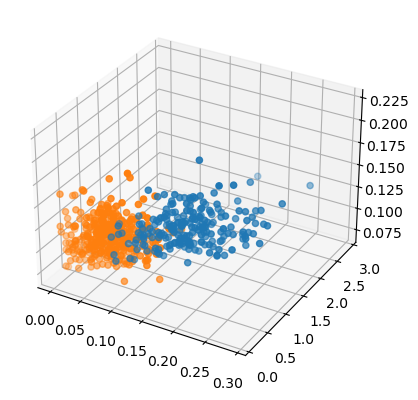

In [46]:
bc = datasets.load_breast_cancer()

data_list = bc.data
labels = bc.target

x1 = [data_list[i][27] for i in range(len(data_list)) if labels[i] == 0]
x2 = [data_list[i][27] for i in range(len(data_list)) if labels[i] != 0]
y1 = [data_list[i][10] for i in range(len(data_list)) if labels[i] == 0]
y2 = [data_list[i][10] for i in range(len(data_list)) if labels[i] != 0]
z1 = [data_list[i][24] for i in range(len(data_list)) if labels[i] == 0]
z2 = [data_list[i][24] for i in range(len(data_list)) if labels[i] != 0]

ax = plt.figure().add_subplot(projection='3d')


ax.scatter(x1,y1,z1)
ax.scatter(x2,y2,z2)
plt.show()

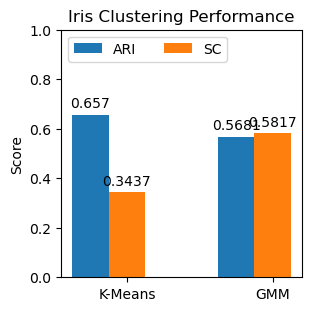

In [3]:
# Iris plots
species = ("K-Means", "GMM")
penguin_means = {
    'ARI': (0.6570, 0.5681),
    'SC': ( 0.3437,0.5817),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(3,3))

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Iris Clustering Performance')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0,1)

plt.show()

In [41]:
KM
Mean times: 0.3261439323425293
Mean rand score: 0.6673014390286682
Rand var score: 4.676395142640808e-05
Mean SC score: 0.3446556522209083
GM
Mean times: 0.06538248062133789
Mean rand score: 0.6707206476880808
Rand var score: 0.0
Mean SC score: 0.3449740051034408

357


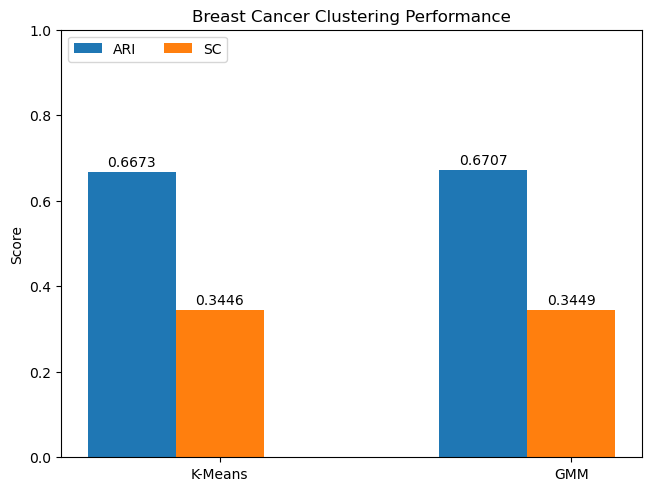

In [30]:
# BC plots
species = ("K-Means", "GMM")
penguin_means = {
    'ARI': (.6673, .6707),
    'SC': ( .3446, .3449),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Breast Cancer Clustering Performance')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0,1)

plt.show()